# KMeans Clustering on Einwohnerzahl

In this notebook, we will perform KMeans clustering on the `Einwohnerzahl` feature from our dataset.

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data from a CSV file
file_path = r"C:\Users\ewalda\OneDrive - NORDAKADEMIE\shared\Lehre\24_WPM_KI_BSc\datenerhebung\2024_11_20_wpm_ki_daten.csv"
data = pd.read_csv(file_path, sep=';', index_col=0)

# Display the first few rows of the dataframe
data.head()

# Remove rows with NaN values
data = data.dropna()

# Alternatively, to fill NaN values with a specific value (e.g., 0)
# data = data.fillna(0)

## Data Preprocessing

We will extract the `Einwohnerzahl` feature and check for any missing values.

In [13]:
# Extract the features
X = data[['Einwohnerzahl', 'DistanzNAK']]

# Check for missing values
X.isnull().sum()

Einwohnerzahl    0
DistanzNAK       0
dtype: int64

## KMeans Clustering

We will use the KMeans algorithm to cluster the data. First, we need to determine the optimal number of clusters using the elbow method.

From the elbow graph, we can determine the optimal number of clusters. Let's assume the optimal number of clusters is 3.

In [22]:
n_clusters = 4

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Display the first few rows of the dataframe with cluster labels
data.head()

c:\Users\ewalda\.conda\envs\ki2\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Koerpergroesse,Lieblingsfilm,Sockenfarbe,Armlaenge,Einwohnerzahl,Handyakku,Sandkoerner,DistanzNAK,Pizza,Mathe,Schuhgroesse,Mahlzeiten_Mensa,Cluster
#,,,,,,,,,,,,,
1,188,Inception,grau,70.0,50.0,39,1000000000000000000000,110000,01.11.2024,7.0,45.0,180.0,2
3,192,Fightclub,weiß;lila,60.0,250.0,34,1000000000000000000000000000000000000000000000...,86000,10.11.2024,6.0,44.0,378.0,2
6,167,Memento,lila,70.0,50000.0,76,1000000000000000,20,03.11.2024,8.0,38.0,200.0,0
11,173,Schindlers Liste,schwarz,54.0,214000.0,64,"3,00",67000,11.11.2024,1.0,43.0,3.0,3
14,197,Das Schweigen der Lämmer,schwarz,70.0,70000.0,71,1000000000000000000000,15000,13.11.2024,8.0,47.0,150.0,0


## Visualize the Clusters

Finally, we will visualize the clusters.

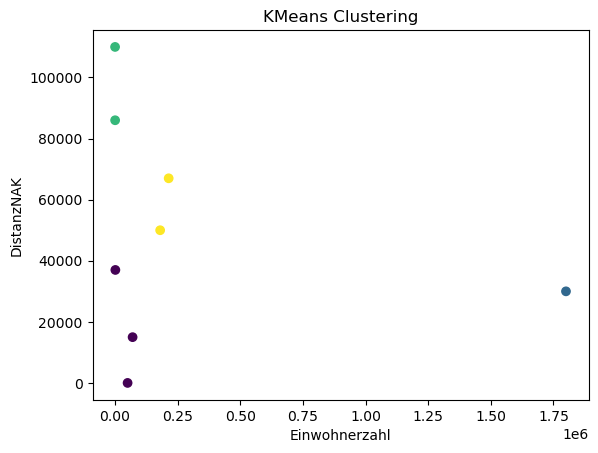

In [23]:
# Visualize the clusters

plt.scatter(X['Einwohnerzahl'], X['DistanzNAK'], c=data['Cluster'], cmap='viridis')
# plt.scatter(X, [0]*len(X), c=data['Cluster'], cmap='viridis')
X['Einwohnerzahl'], X['DistanzNAK']
plt.xlabel('Einwohnerzahl')
plt.ylabel('DistanzNAK')
plt.title('KMeans Clustering')
plt.show()